<a href="https://colab.research.google.com/github/ind-kum/DEEP-LEARNING-PROJECTS/blob/master/Callback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import os

In [2]:
# Training Parameters
batch_size = 64
epochs = 10

# Loads the MINST dataset
(x_train, y_train,), (x_test, y_test) = mnist.load_data()

In [3]:
# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

In [4]:
# Getting out date in the right "shape" needed for keras
# we need to add a 4th dimention to our date thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [5]:
# store our image type to float32 data type
input_shape = (img_rows, img_cols, 1)

In [6]:
# change out image type to fload32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
#  Normalise our data byu changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
# Now we one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [9]:
# Let's count the number columns in out hot encoded matrix
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of Classes: 10


In [10]:
# create model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = keras.optimizers.Adadelta(),
             metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [ ]:
# Let's create ModelCheckpoint
checkpoint = ModelCheckpoint(r"C:\Users\INDROCKS\MNIST_Checkpoint.h5",
                             moniter="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

# Let's create EarlyStopping
earlystop = EarlyStopping(monitor = 'val_loss', # value being monitored for improvement
                          min_delta = 0, #Abs value and it the min change erequired before we stop
                          patience = 3, #Number of epochs we wait before stopping
                          verbose = 1,
                          restore_best_weights = True)  #keeps the best weights once stopped

# Let's Reduce the learning rate
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                             factor = 0.2,
                             patience = 3,
                             verbose = 1,
                             min_delta = 0.0001)
# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

In [12]:
history = model.fit(x_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    callbacks = callbacks,
                    validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
938/938 [==============================] - 106s 113ms/step - loss: 2.2931 - accuracy: 0.1370 - val_loss: 2.2341 - val_accuracy: 0.5435

Epoch 00001: val_loss improved from inf to 2.23405, saving model to C:\Users\INDROCKS\MNIST_Checkpoint.h5
Epoch 2/10
938/938 [==============================] - 106s 113ms/step - loss: 2.2223 - accuracy: 0.3250 - val_loss: 2.1345 - val_accuracy: 0.6843

Epoch 00002: val_loss improved from 2.23405 to 2.13451, saving model to C:\Users\INDROCKS\MNIST_Checkpoint.h5
Epoch 3/10
938/938 [==============================] - 105s 112ms/step - loss: 2.1183 - accuracy: 0.4701 - val_loss: 1.9803 - val_accuracy: 0.7441

Epoch 00003: val_loss improved from 2.13451 to 1.98034, saving model to C:\Users\INDROCKS\MNIST_Checkpoint.h5
Epoch 4/10
938/938 [==============================] - 107s 114ms/step - loss: 1.9599 - accuracy: 0.5549 - val_loss: 1.7459 - val_accuracy: 0.7792

Epoch 00004: val_loss improved from 1.98034 to 1.74593, saving model to C:\Users\INDRO

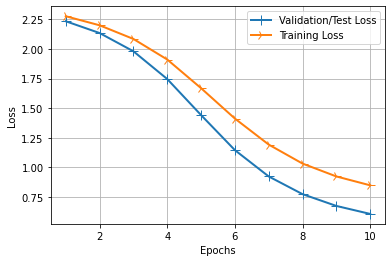

In [13]:
# plotting out loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

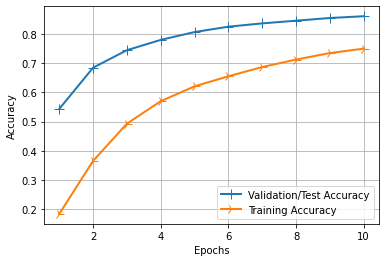

In [14]:
# Plotting the accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()